In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
import pandas as pd
import data_preparation as dd
import keras_model as kk

In [3]:
train_1 = pd.read_csv("../web-traffic-time-series-forecasting/train_1.csv")
data = dd.data_per_date(train_1)

In [4]:
data['Page'][12345]

'Edward_Snowden'

In [5]:
ML = dd.find_page(data,data['Page'][12345])
size = int(0.80*len(ML))
lookback = 1
train, test = kk.series_split(ML, size)
scaler, train_scaled, test_scaled = kk.scale(train, test)

lstm_model = kk.fit_lstm(train_scaled, units = 50, \
                         batch_size = 10, nb_epochs = 100, \
                         lookback = lookback)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
440/440 [==============================] - 4s 10ms/step - loss: 0.5752
Epoch 1/1
440/440 [==============================] - 1s 1ms/step - loss: 0.0801
Epoch 1/1
440/440 [==============================] - 1s 1ms/step - loss: 0.0418
Epoch 1/1
440/440 [==============================] - 1s 1ms/step - loss: 0.0405
Epoch 1/1
440/440 [==============================] - 1s 1ms/step - loss: 0.0379
Epoch 1/1
440/440 [==============================] - 1s 1ms/step - loss: 0.0341
Epoch 1/1
440/440 [==============================] - 1s 1ms/step - loss: 0.0335
Epoch 1/1
440/440 [==============================] - 1s 2ms/step - loss: 0.0301
Epoch 1/1
440/440 [==============================] - 1s 1ms/step - loss: 0.0265
Epoch 1/1
440/440 [=========================

440/440 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 1/1
440/440 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 1/1
440/440 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 1/1
440/440 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 1/1
440/440 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 1/1
440/440 [==============================] - 1s 1ms/step - loss: 0.0033
Epoch 1/1
440/440 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 1/1
440/440 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 1/1
440/440 [==============================] - 1s 2ms/step - loss: 0.0026


In [6]:
import numpy as np
X_train, y_train = kk.create_dataset(train_scaled, lookback)
#X_train = np.reshape(X_train, (X_train.shape[0], lookback, X_train.shape[2]))

X_test, y_test = kk.create_dataset(test_scaled, lookback)
#shape = X_test.shape
#X_test = np.reshape(X_test, (X_test.shape[0], lookback, X_test.shape[2]))

In [7]:
from sklearn.metrics import mean_absolute_error

#X_test = X_test.reshape(len(X_test),lookback)
#X_test = X_test[:,0].reshape(len(X_test), 1, 1)
test_pred = lstm_model.predict(X_test)

#X_test = X_test.reshape((X_test.shape[0], 1))
print('Test Mean Absolute Error:', mean_absolute_error(X_test[0:,0],test_pred))
#X_test = X_test.reshape((X_test.shape[0], 1,1))

Test Mean Absolute Error: 0.01098603572854726


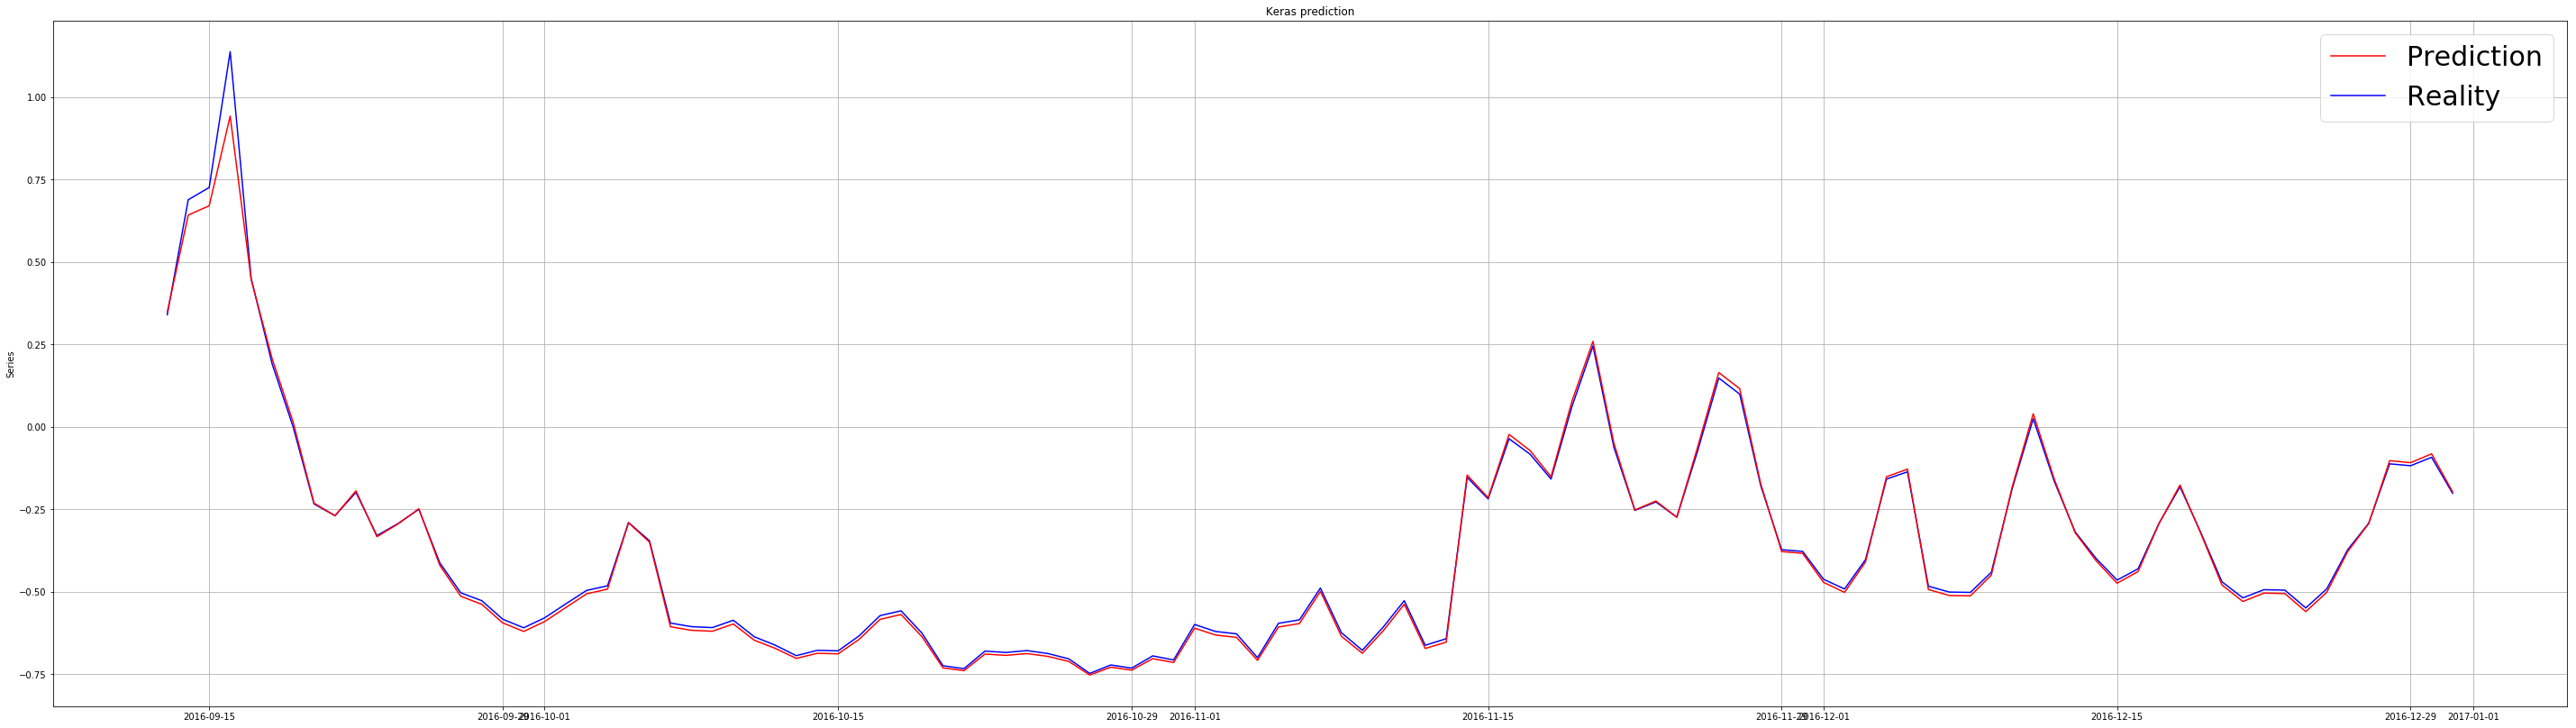

In [12]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(50, 14))
line_down, = plt.plot(test.index[0:len(test)-lookback+1],X_test[0:,0],\
                      label='Reality', color = 'b')
line_up, = plt.plot(test.index[0:len(test)-lookback+1], test_pred,\
                    label='Prediction', color = 'r')
plt.ylabel('Series')
plt.legend(handles=[line_up, line_down], prop={'size': 30})
plt.title('Keras prediction')
plt.grid()
plt.show()

In [9]:
#predictions2 = list()
#predictions2.append(0)
#raw_values = ML.values
#for i in range(1,len(test_scaled)):
#    # make one-step forecast
#    temp = X_test[i][0][0]
#    temp = temp.reshape((1,1,1))
#    yhat = lstm_model.predict(temp)
#    yhat = kk.invert_scale(scaler, temp, yhat)
#    predictions2.append(yhat[0,0])
#    expected = raw_values[len(train) + i]



In [10]:
#X_test = X_test.reshape((X_test.shape[0], 1))
#print('Test Mean Absolute Error:', mean_absolute_error(X_test,test_pred))

In [11]:
#plt.figure(figsize=(50, 14))
#line_down, = plt.plot(test.index,test_scaled,label='Reality', color = 'b')
#line_up, = plt.plot(test.index, predictions2,label='Prediction', color = 'r')
#plt.ylabel('Series')
#plt.legend(handles=[line_up, line_down], prop={'size': 30})
#plt.title('Keras prediction')
#plt.grid()
#plt.show()